The dataset is taken from kaggle and contains ball by ball description of Indian Premier League and every other detail like wicket taken batsman in strike etc.

Q1)plotting a bar graph to see which team has the highest number of runs in the ipl season from 2008 to 2018.

Q2)who is the most successful wicketkeeper in ipl?

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
import seaborn as sns

In [117]:
df=pd.read_csv("deliveries.csv")

In [118]:
df[100:120]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
100,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,2,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
101,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,3,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
102,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
103,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,5,DJ Hooda,Yuvraj Singh,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
104,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,6,DJ Hooda,Yuvraj Singh,TS Mills,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
105,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,1,DJ Hooda,Yuvraj Singh,A Choudhary,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
106,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,2,DJ Hooda,Yuvraj Singh,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
107,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,3,Yuvraj Singh,DJ Hooda,A Choudhary,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
108,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,4,Yuvraj Singh,DJ Hooda,A Choudhary,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
109,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,18,5,Yuvraj Singh,DJ Hooda,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [119]:
df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [120]:
searchfor = ["Rising Pune Supergiant","Pune Warriors","Kochi Tuskers Kerala","Gujarat Lions"]
df = df[~df.batting_team.str.contains('|'.join(searchfor))]

In [121]:
df = df[~df["batting_team"].isin(searchfor)]

In [122]:
df["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Delhi Capitals'], dtype=object)

In [123]:
df["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Gujarat Lions', 'Delhi Daredevils',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [124]:
df=df[~df["bowling_team"].isin(searchfor)]

In [125]:
df["bowling_team"].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Rising Pune Supergiants', 'Delhi Capitals'],
      dtype=object)

In [126]:
df["fielder"].unique()

array([nan, 'Mandeep Singh', 'Sachin Baby', 'DA Warner', 'BCJ Cutting',
       'Yuvraj Singh', 'MC Henriques', 'CJ Jordan (sub)', 'SV Samson',
       'RR Pant', 'SW Billings', 'S Nadeem', 'CH Morris', 'B Stanlake',
       'STR Binny', 'MJ McClenaghan', 'HH Pandya', 'KA Pollard',
       'RV Uthappa', 'R Dhawan (sub)', 'SP Narine', 'GJ Maxwell',
       'WP Saha', 'PA Patel', 'N Rana', 'B Kumar', 'S Dhawan',
       'G Gambhir', 'MK Pandey', 'CR Woakes', 'SA Yadav', 'AR Patel',
       'JC Buttler', 'RG Sharma', 'JJ Bumrah', 'CH Gayle', 'S Aravind',
       'AB de Villiers', 'Rashid Khan', 'NV Ojha', 'C de Grandhomme',
       'EJG Morgan', 'DA Miller', 'MM Sharma', 'Z Khan', 'KK Nair',
       'UT Yadav', 'AD Mathews', 'Sandeep Sharma', 'A Mishra', 'SS Iyer',
       'DJ Hooda', 'V Shankar (sub)', 'CJ Anderson', 'PJ Cummins',
       'K Rabada', 'Harbhajan Singh', 'KM Jadhav', 'YS Chahal',
       'S Badree', 'V Kohli', 'TS Mills', 'NM Coulter-Nile',
       'Kuldeep Yadav', 'SP Jackson', 'S Kaul

In [127]:
df_bat=df.groupby("batting_team").agg({"total_runs":sum})
df_bat

,total_runs
batting_team,
Chennai Super Kings,25230
Deccan Chargers,10697
Delhi Capitals,2630
Delhi Daredevils,22122
Kings XI Punjab,26006
Kolkata Knight Riders,25442
Mumbai Indians,27555
Rajasthan Royals,21456
Royal Challengers Bangalore,25682


Now as we can see delhi capitals is having so less runs because the earlier name for delhi capitals was delhi daredevils.So we need to add the runs for delhi daredevils and delhi capital together.same for sunrisers hyderabad and deccan chargers.

In [128]:
df_bat.loc["Delhi Capitals"]=df_bat.loc["Delhi Capitals"]+df_bat.loc["Delhi Daredevils"]
df_bat.loc["Sunrisers Hyderabad"]=df_bat.loc["Sunrisers Hyderabad"]+df_bat.loc["Deccan Chargers"]

In [129]:
df_bat

,total_runs
batting_team,
Chennai Super Kings,25230
Deccan Chargers,10697
Delhi Capitals,24752
Delhi Daredevils,22122
Kings XI Punjab,26006
Kolkata Knight Riders,25442
Mumbai Indians,27555
Rajasthan Royals,21456
Royal Challengers Bangalore,25682


In [130]:
df_bat=df_bat.drop(["Deccan Chargers","Delhi Daredevils"])

In [131]:
df_bat

,total_runs
batting_team,
Chennai Super Kings,25230
Delhi Capitals,24752
Kings XI Punjab,26006
Kolkata Knight Riders,25442
Mumbai Indians,27555
Rajasthan Royals,21456
Royal Challengers Bangalore,25682
Sunrisers Hyderabad,26472


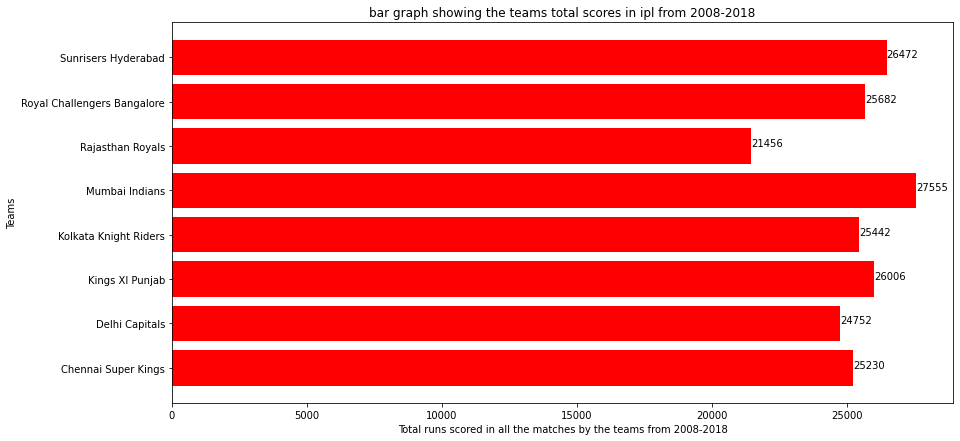

In [132]:
plt.figure(figsize=(14,7))
plt.barh(df_bat.index.values,df_bat["total_runs"],color="red")
plt.xlabel("Total runs scored in all the matches by the teams from 2008-2018")
plt.ylabel("Teams")
plt.title("bar graph showing the teams total scores in ipl from 2008-2018")
for index, value in enumerate(df_bat["total_runs"]):
    plt.text(value, index, str(value))

In [133]:
df["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'stumped', 'lbw',
       'caught and bowled', 'retired hurt', 'hit wicket',
       'obstructing the field'], dtype=object)

In [134]:
df2=df[df["dismissal_kind"]=="stumped"]

In [135]:
df2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
1013,5,1,Royal Challengers Bangalore,Delhi Daredevils,9,4,SR Watson,KM Jadhav,S Nadeem,0,...,0,0,0,0,0,0,0,SR Watson,stumped,RR Pant
3274,14,2,Sunrisers Hyderabad,Kolkata Knight Riders,14,2,DJ Hooda,Yuvraj Singh,SP Narine,0,...,0,0,0,0,0,0,0,DJ Hooda,stumped,RV Uthappa
4308,18,2,Kolkata Knight Riders,Delhi Daredevils,20,2,CR Woakes,MK Pandey,A Mishra,0,...,0,0,0,0,0,0,0,CR Woakes,stumped,RR Pant
4368,19,1,Sunrisers Hyderabad,Kings XI Punjab,10,1,MC Henriques,DA Warner,AR Patel,0,...,0,0,0,0,0,0,0,MC Henriques,stumped,WP Saha
4408,19,1,Sunrisers Hyderabad,Kings XI Punjab,16,3,NV Ojha,DA Warner,KC Cariappa,0,...,0,0,0,0,0,0,0,NV Ojha,stumped,WP Saha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176657,11341,2,Delhi Capitals,Chennai Super Kings,12,4,CH Morris,SS Iyer,RA Jadeja,0,...,0,0,0,0,0,0,0,CH Morris,stumped,MS Dhoni
176659,11341,2,Delhi Capitals,Chennai Super Kings,12,6,SS Iyer,J Suchith,RA Jadeja,0,...,0,0,0,0,0,0,0,SS Iyer,stumped,MS Dhoni
177237,11344,1,Rajasthan Royals,Delhi Capitals,12,2,S Gopal,R Parag,A Mishra,0,...,0,0,0,0,0,0,0,S Gopal,stumped,RR Pant
178177,11412,1,Chennai Super Kings,Mumbai Indians,13,1,M Vijay,AT Rayudu,RD Chahar,0,...,0,0,0,0,0,0,0,M Vijay,stumped,Q de Kock


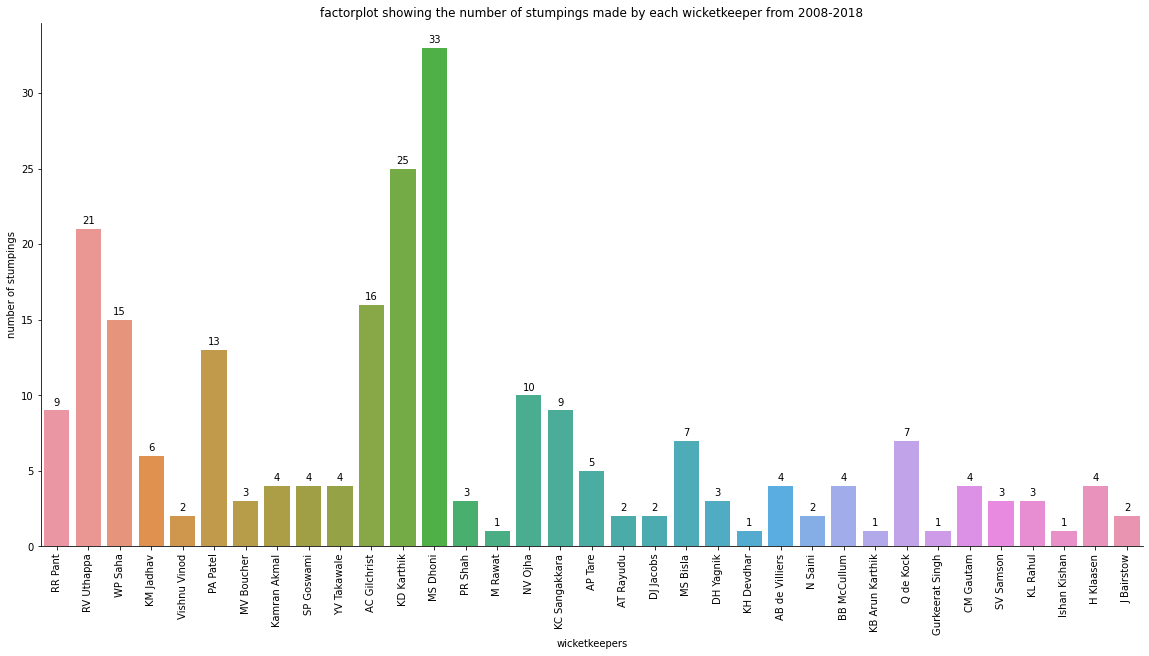

In [273]:
op=sns.factorplot("fielder",kind="count",data=df2,size=8,aspect=2)
plt.xlabel("wicketkeepers")
plt.ylabel("number of stumpings")
plt.title("factorplot showing the number of stumpings made by each wicketkeeper from 2008-2018")
plt.xticks(rotation=90)
for ax in op.axes.ravel():
    for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')


from the abover figure it is clearly visible that ms dhoni has the most number of stumpings in ipl history.

DATASET 2

Q1)In 2015 which player had won the player of the match award maximum number of times?

Q2)What do teams prefer fielding first ot batting first as overall,in eden gardens and chinaswamy stadium?

In [137]:
df_1=pd.read_csv("ipl_match.csv")

In [138]:
df_1.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [225]:
d=["2017"]

In [226]:
df_2=df_1[df_1["season"].isin(d)]

In [227]:
df_2

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

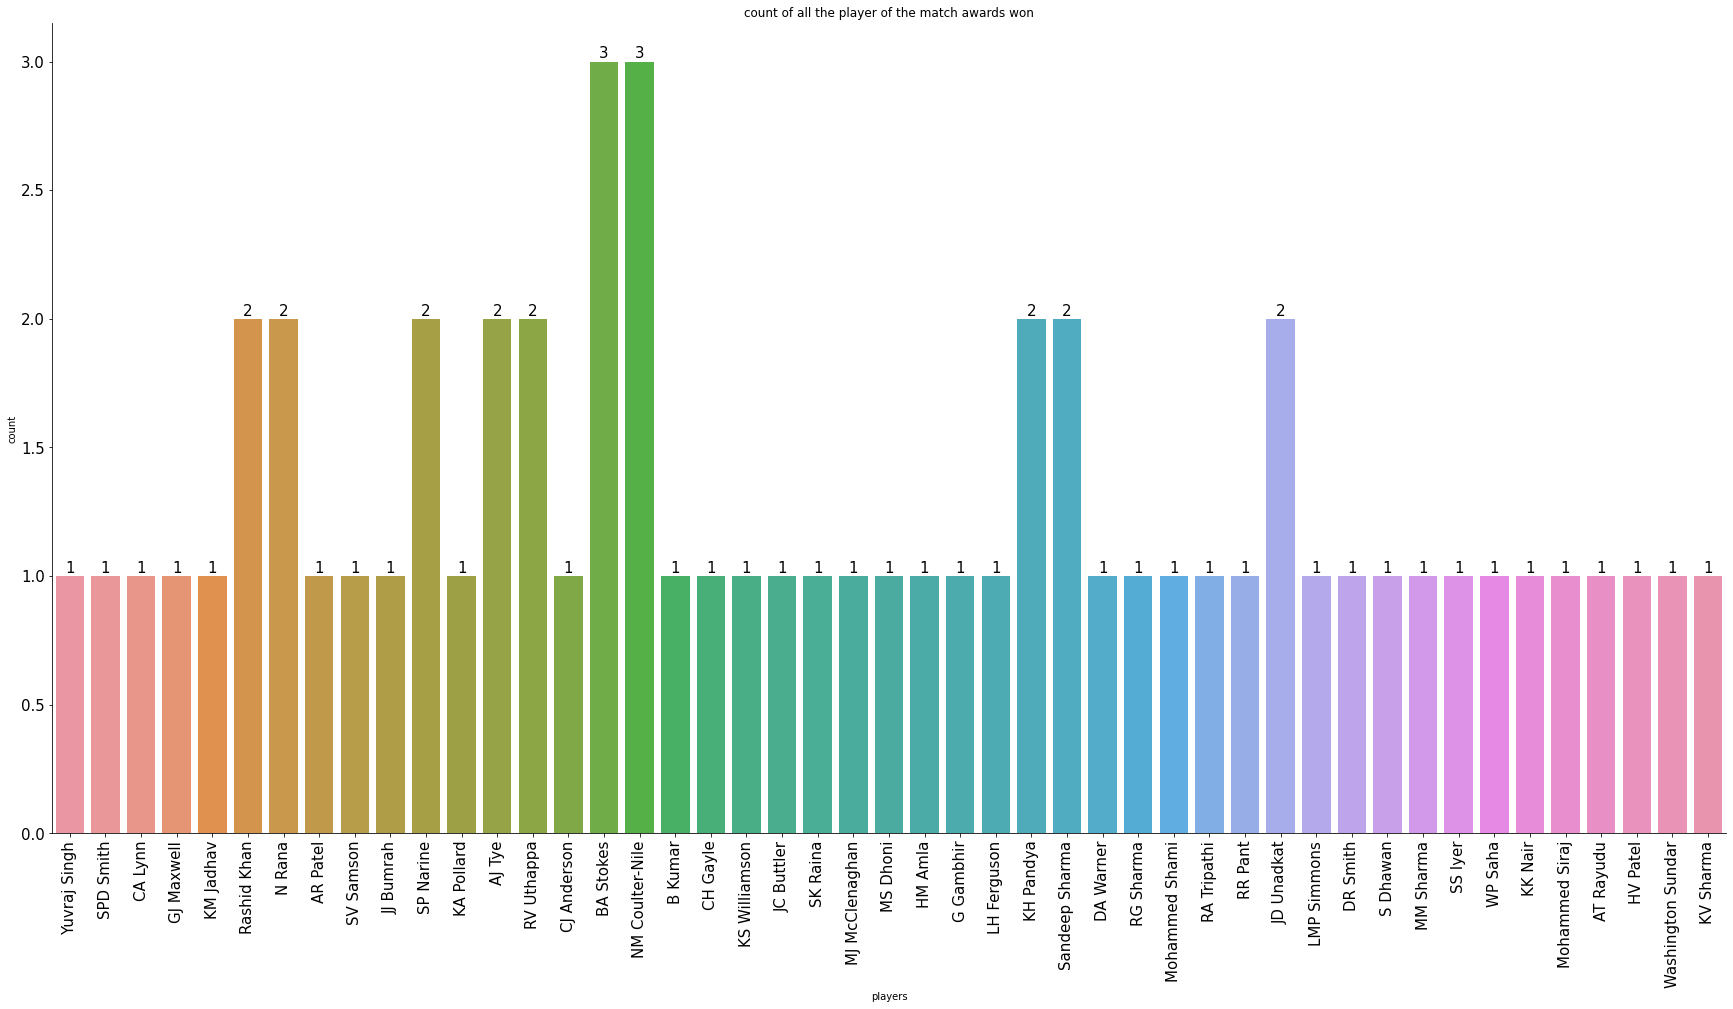

In [283]:
plt.figure()
splot=sns.factorplot("player_of_match",data=df_2,kind="count",size=12,aspect=2)
plt.xlabel("players")
plt.ylabel("count")
plt.title("count of all the player of the match awards won")
plt.yticks(size=15)
for ax in splot.axes.ravel():
    for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0,8),size=15,textcoords='offset points')
plt.xticks(size=15,rotation=90)

We can see here that two players have tied here.Both Ben Stokes and Nathan Coulter Nile have won 3 player
of the match award

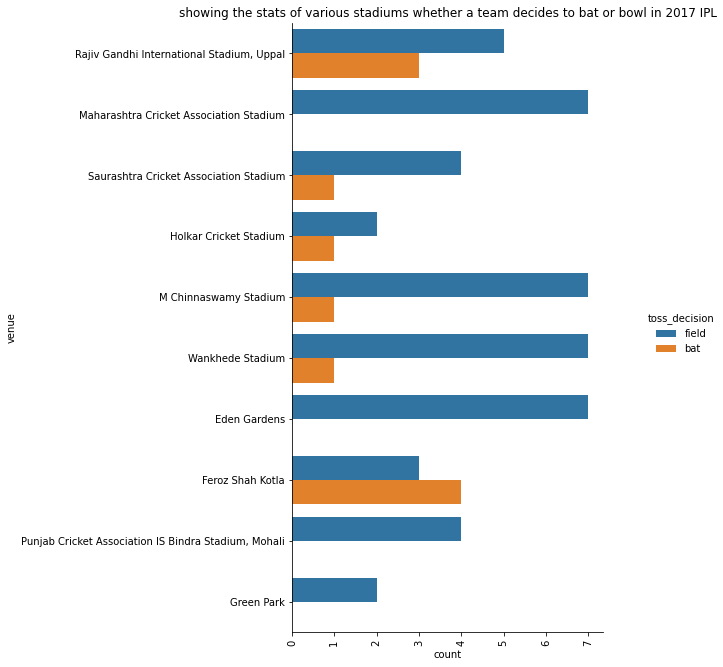

In [275]:
sns.factorplot(y="venue",data=df_2,hue="toss_decision",kind="count",size=9,aspect=1)
plt.xticks(size=10,rotation=90)
plt.title("showing the stats of various stadiums whether a team decides to bat or bowl in 2017 IPL")
for ax in splot.axes.ravel():
    for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

So here we see an interesting trend.In stadiums like Eden gardens,punjab cricket association mohali,green park,maharastra cricket association no teams have decided to bat first.All the teams prefer fielding first in these stadiums.Alternatively in all the stadiums there is a trend that teams prefer fielding first EXCEPT FEROZ SHAH KOTLA.For some reasons teams prefer batting first in Feroz Shah Kotla. 